In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from Dude import createSQL
import numpy as np

In [3]:
conn = sqlite3.connect('../data/homework_data.db')
c = conn.cursor()


In [4]:
table = pd.read_sql_query(
    """
    SELECT route_id
            stop_sequence,
            stop_id,
            direction_id
            From trips
    Join stop_times 
    on (trips.trip_id = stop_times.trip_id)
    """
    ,
    conn
)

In [5]:
createSQL("t1",table, conn)

In [6]:
t2 = pd.read_sql_query(
    """
    SELECT 
    stop_id, COUNT(stop_id) as stop_count
    FROM trips
    Join stop_times on stop_times.trip_id = trips.trip_id
    group by (stop_id)
    ;


    """,conn)

In [7]:
createSQL("mynodes",t2, conn)

In [8]:
gdata = pd.read_sql_query(
    """
    SELECT stops.stop_id, stop_name, stop_lat, stop_lon, mynodes.stop_count
    FROM stops
    Join mynodes
    on stops.stop_id = mynodes.stop_id
    ;
    """
    ,conn)
createSQL("gdata",gdata, conn)

In [20]:
frqeq = pd.read_sql_query(
    """
    SELECT stop_count, COUNT(stop_count) AS Frequency

  FROM gdata

  GROUP BY stop_count

  ORDER BY

  COUNT(stop_count) DESC
    ;
    """
    ,conn)



The average degree of distribution is 3.9823




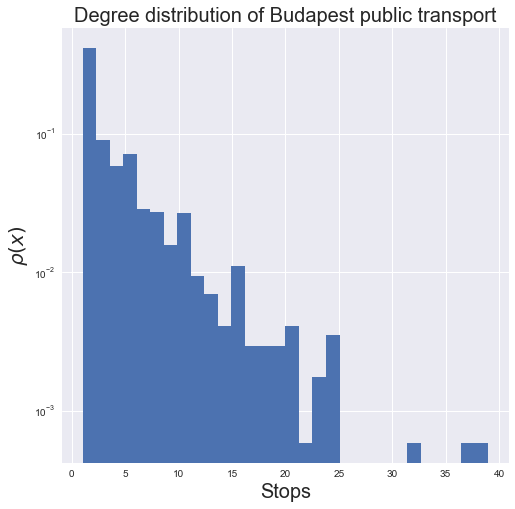

In [22]:
distr = frqeq.Frequency
plt.hist(distr, bins = 30, density=True)
plt.yscale("log")
plt.title("Degree distribution of Budapest public transport")
plt.ylabel(r"$\rho(x)$")
plt.xlabel("Stops")
print(f"""

The average degree of distribution is {np.mean(distr):.4f}

""")